In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import gpflow
from gpflow.utilities import print_summary, set_trainable

import params

plt.rcParams.update(params.fig_params) 
np.random.seed(1)

In [7]:
N     = 40  # number of samples
sigma = 0.2 # noise variance

# Sampling the ground-truth 
xmin  = -3*np.pi
xmax  =  3*np.pi

delta = 2
X1 = np.random.uniform(xmin, -delta, (int(N/2), 1))
X2 = np.random.uniform(delta, xmax, (int(N/2), 1))
X  = np.concatenate([X1,X2], axis=0)

delta = np.random.normal(0, sigma, (N, 1))
Y     = np.sin(X) + 0.02*np.square(X) + delta 

# Dataset needs to be converted to tensor for GPflow to handle it
data  = (tf.convert_to_tensor(X, "float64"), tf.convert_to_tensor(Y, "float64"))

# Gridding the space 
xx = np.linspace(xmin * 1.15, xmax * 1.15, 1000).reshape(-1, 1) 
fxx = np.sin(xx) + 0.02*np.square(xx)


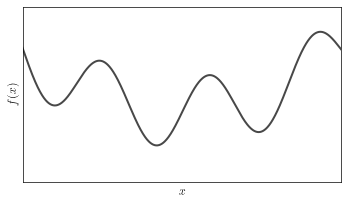

In [9]:
# Defining the GP

# Plotting the results (two standard deviations = 95% confidence)
fig = plt.figure()

plt.xlabel('$x$')
plt.ylabel('$f(x)$')

plt.plot(xx, fxx, color=params.colors["grey"], lw=2)

plt.xlim(xmin,xmax)
plt.ylim(-2,3)
plt.xticks([])
plt.yticks([])
fig.tight_layout()
plt.show()

filename = 'TPS_gt.png'
fig.savefig(filename, bbox_inches='tight', dpi=200)

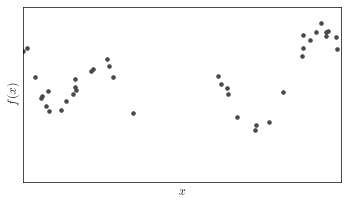

In [10]:
# Samples

fig = plt.figure()

plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.plot(X, Y, "o", color=params.colors["grey"], ms=3.5)

plt.xlim(xmin,xmax)
plt.ylim(-2,3)
plt.xticks([])
plt.yticks([])
fig.tight_layout()
plt.show()

filename = 'TPS_samples.png'
fig.savefig(filename, bbox_inches='tight', dpi=200)

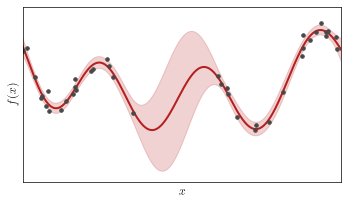

In [13]:
# Defining the GP
kernel = gpflow.kernels.SquaredExponential()
my_gp  = gpflow.models.GPR(data, kernel=kernel) 
opt = gpflow.optimizers.Scipy()
opt.minimize(my_gp.training_loss, my_gp.trainable_variables, tol=1e-11, options=dict(maxiter=1000), method='l-bfgs-b')

mean, var = my_gp.predict_f(xx)

# Plotting the results (two standard deviations = 95% confidence)
fig = plt.figure()

plt.xlabel('$x$')
plt.ylabel('$f(x)$')

plt.plot(xx, mean, color=params.colors["red"], lw=2)
plt.fill_between(xx[:,0],
                 mean[:,0] - 2*np.sqrt(var[:,0]),
                 mean[:,0] + 2*np.sqrt(var[:,0]),
                 color=params.colors["red"],
                 alpha=0.2)
plt.plot(X, Y, "o", color=params.colors["grey"], ms=3.5)
#plt.xlabel('x'), plt.ylabel('f(x)')
#plt.title('Gaussian process regression with ' + str(N) + ' samples')

plt.xlim(xmin,xmax)
plt.ylim(-2,3)
plt.xticks([])
plt.yticks([])
fig.tight_layout()
plt.show()

filename = 'TPS_gp.jpg'
fig.savefig(filename, bbox_inches='tight', dpi=200)